## Machine Learning

#### importing Libraries

In [1]:
import pandas as pd
import numpy as np

#### Importing & Basic info

In [103]:
df = pd.read_csv("/Users/Abhi/Desktop/Innomatics/Machine Learning/Dataset/Churn.csv")

In [104]:
pd.set_option("display.max_columns",None)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Target Column Selection

In [106]:
y = df.Churn

#### Type Convertions

In [107]:
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors = "coerce")

In [108]:
df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)

In [109]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Checking Outliers

In [110]:
def check_outliers(data_f,col_n):
  q1 = data_f[col_n].quantile(0.25)
  q3 = data_f[col_n].quantile(0.75)

  iqr = q3-q1

  #lower bound
  lb = q1-(1.5*iqr)

  #upper bound
  ub = q3+(1.5*iqr)

  if(len(data_f[(data_f[col_n] < lb) | (data_f[col_n] >ub)>1])):
    print(f"Outliers found in {col_n} and cout is {len(data_f[(data_f[col_n] < lb) | (data_f[col_n] >ub)>=1])}")

In [111]:
for i in df.select_dtypes(include="number").columns:
  check_outliers(df,i)

In [112]:
df2 = df.copy()

In [113]:
df.drop(["customerID","Churn"],axis=1,inplace=True) #dropping unnecessary columns from dataframe

### Standardization

In [114]:
#standardising numerical variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
num_df = pd.DataFrame(ss.fit_transform(df.select_dtypes(include="number")),columns=df.select_dtypes(include="number").columns)

In [115]:
cat_df = pd.get_dummies(df.select_dtypes(exclude="number"),dtype="int")

In [116]:
X = pd.concat([cat_df,num_df],axis=1)

In [56]:
# y = pd.get_dummies(y,dtype="int")
# y = y.map({"Yes":1,"No":0})

### Train-Test-Split

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [119]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4718, 45), (4718,), (2325, 45), (2325,))

### ML Models

#### SVM

In [121]:
from sklearn.svm import SVC
sv = SVC(C=100,gamma=0.00001)
y_pred=sv.fit(X_train,y_train).predict(X_test)

In [122]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1705
         Yes       0.68      0.44      0.53       620

    accuracy                           0.80      2325
   macro avg       0.75      0.68      0.70      2325
weighted avg       0.78      0.80      0.78      2325



In [124]:
accuracy_score(y_test,y_pred)*100

79.56989247311827

#### Navie Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
test_pred = gnb.fit(X_train, y_train).predict(X_test)

In [127]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          No       0.92      0.65      0.76      1705
         Yes       0.47      0.84      0.60       620

    accuracy                           0.70      2325
   macro avg       0.69      0.75      0.68      2325
weighted avg       0.80      0.70      0.72      2325



In [128]:
accuracy_score(y_test,test_pred)*100

70.10752688172043

#### Knn Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn_predicted = knn.fit(X_train, y_train).predict(X_test.values) 

In [142]:
accuracy_score(y_test,knn_predicted)*100

79.01075268817205

## **Exploratory Data Analysis**


##### Basic info

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


#### Uni-Variant Analysis

In [143]:
df2.drop(["customerID"],inplace=True,axis=1)
df2["Churn"] = df2["Churn"].replace({"Yes":1,"No":0})
dummies = pd.get_dummies(df2)

<Axes: >

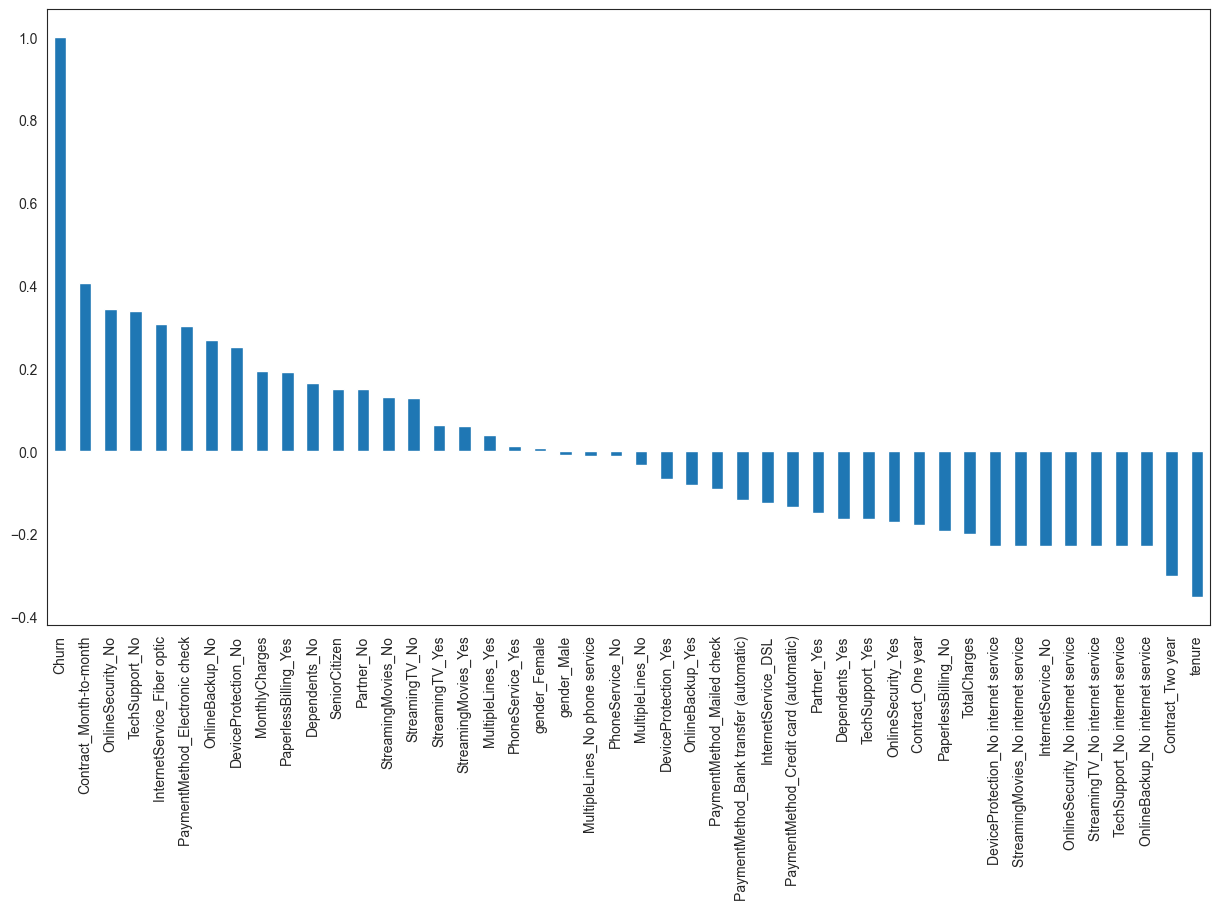

In [146]:
sns.set_style("white")
plt.figure(figsize=(15,8))
dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

`Observations`:
  - Month to month contracts, absence of online security and no tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.



In [147]:
sns.set_style('whitegrid')
sns.set_palette("tab10", 9)

##### Categorical Columns


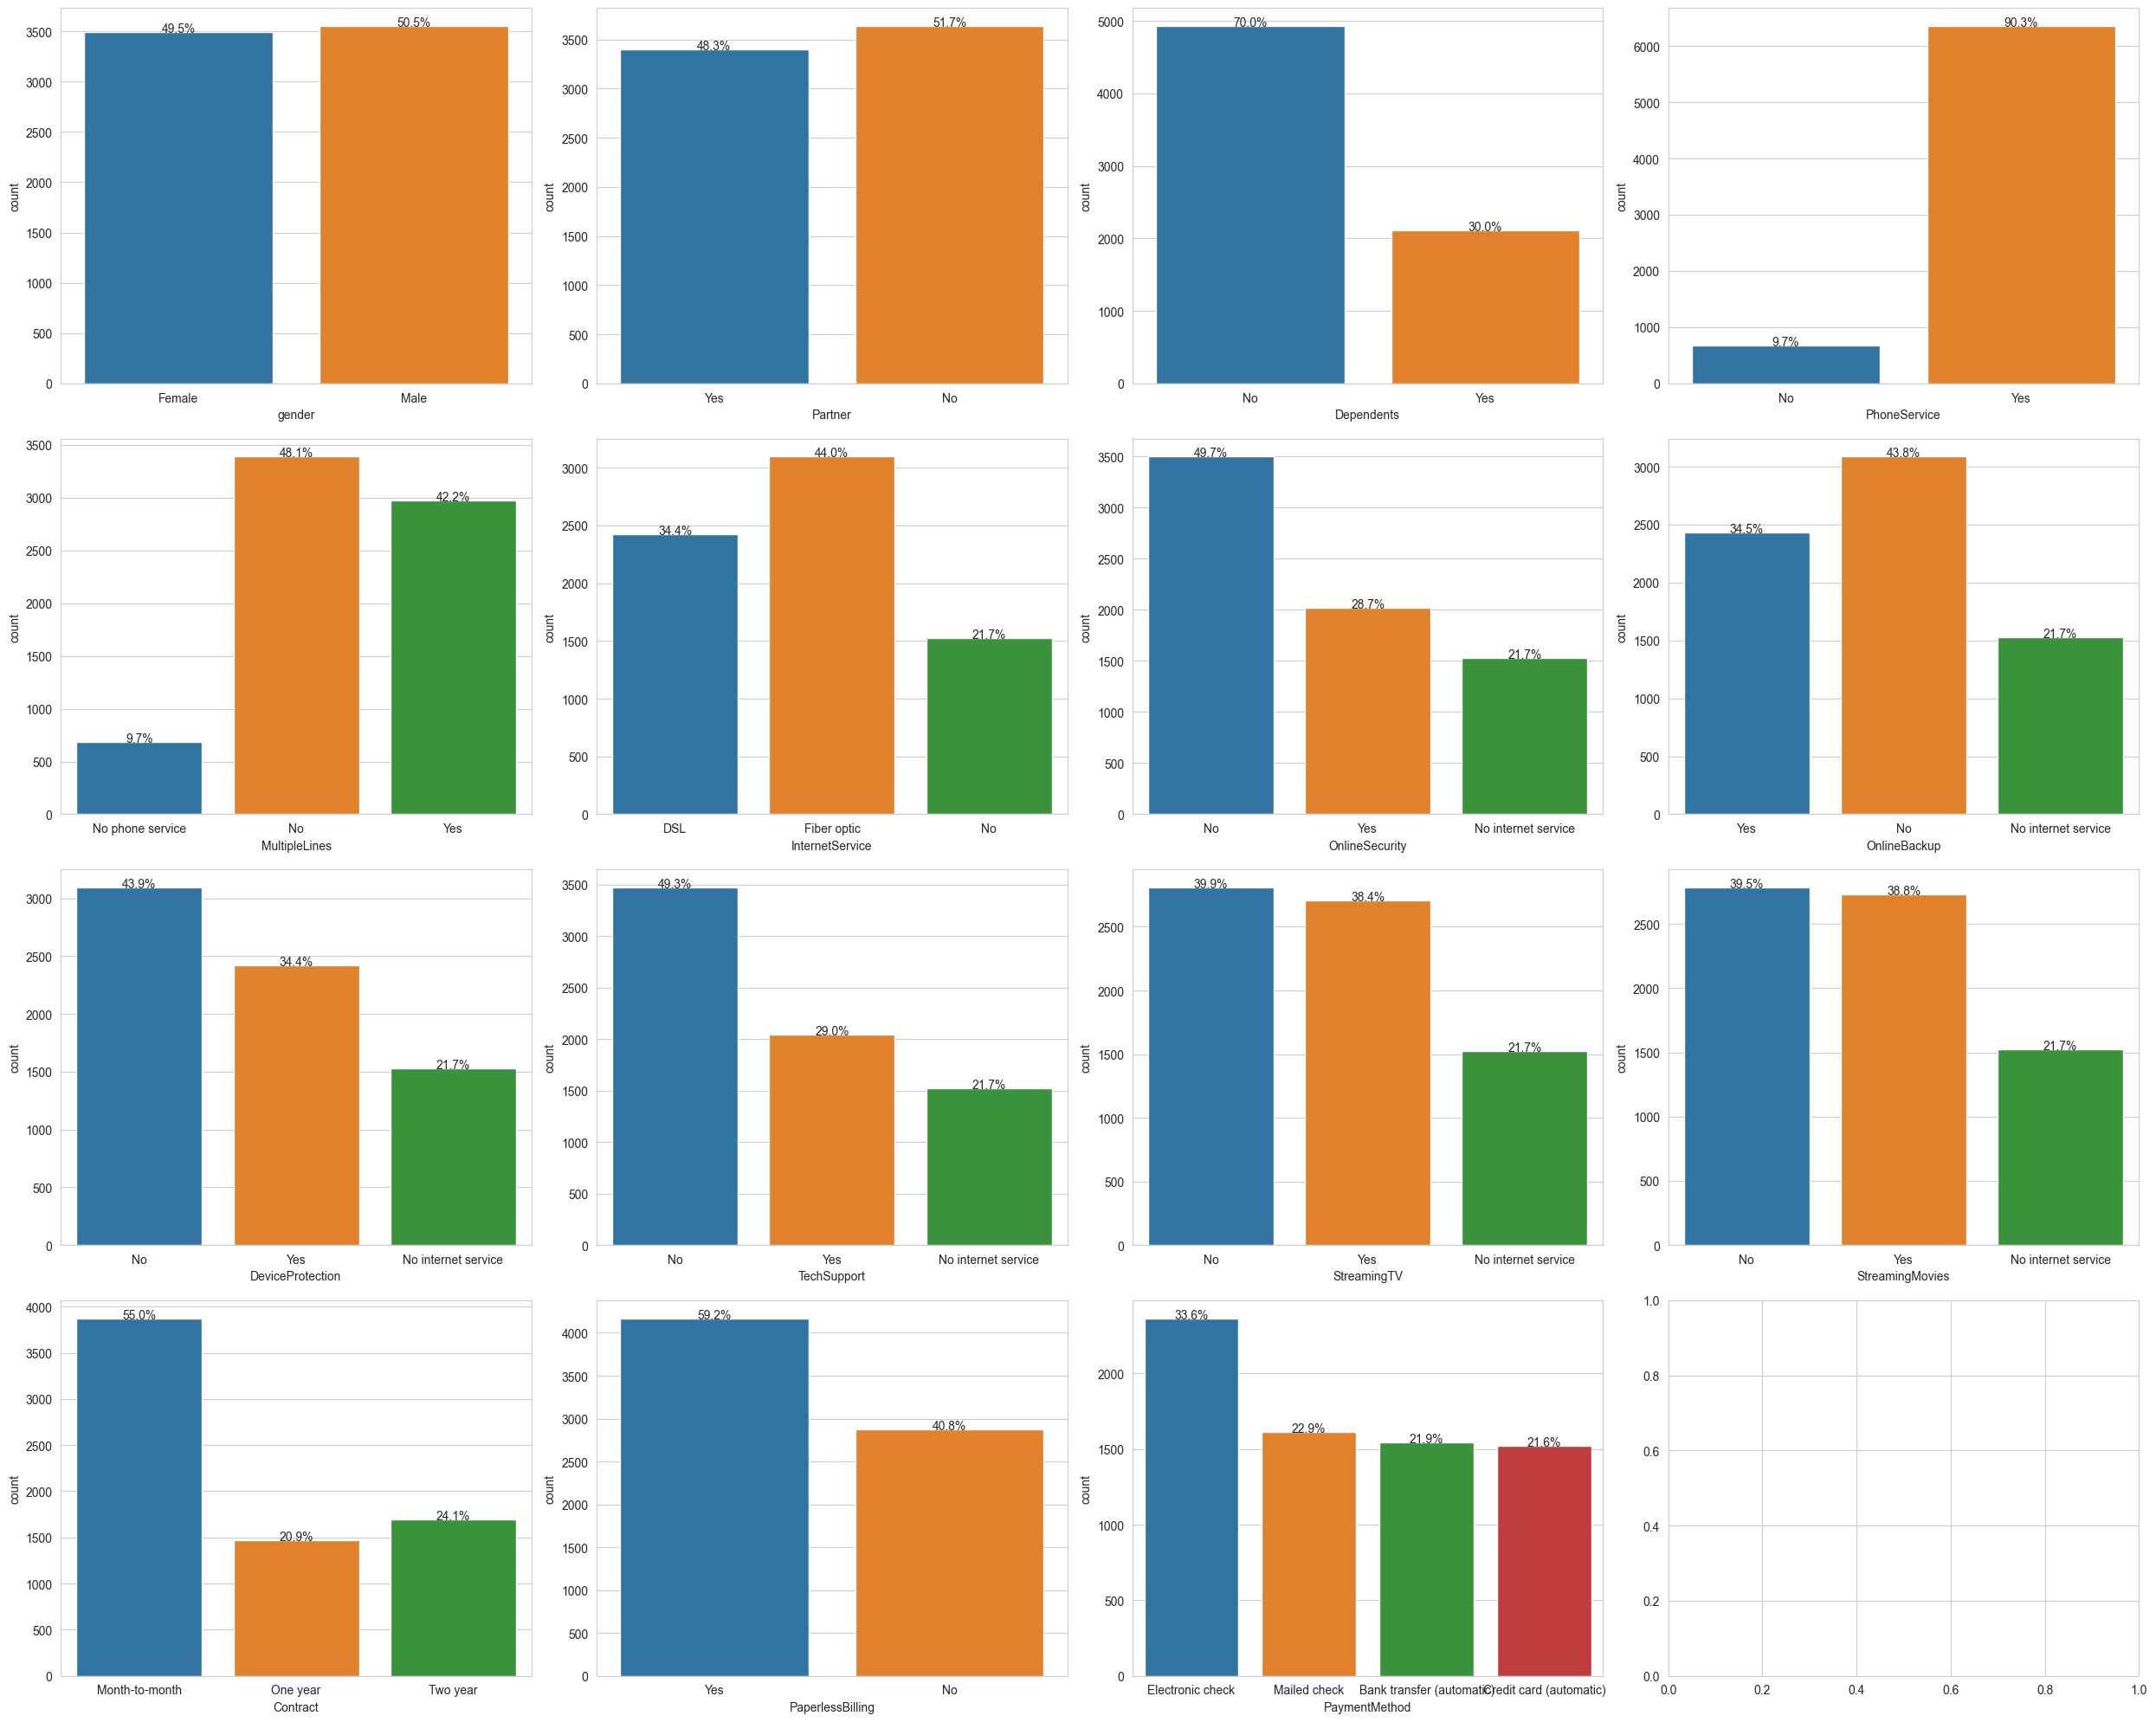

In [148]:
fig,axes = plt.subplots(4,4,figsize=(25,20),layout="tight")
axes = axes.ravel()
total = len(df)  # Total number of observations

for i,ax in zip(df.select_dtypes(exclude="number").columns,axes):
    a = sns.countplot(df,x=i,ax=ax)
     # Add percentage labels on top of each bar
    for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        a.annotate(percentage, (x, y), ha='center')

plt.tight_layout()

<Axes: ylabel='count'>

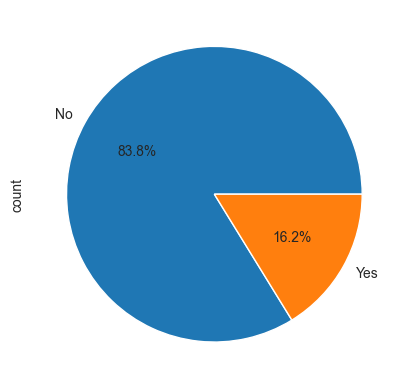

In [149]:
df.SeniorCitizen.map({0:"No",1:"Yes"}).value_counts().plot(kind="pie",autopct="%.1f%%")

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


<Axes: ylabel='count'>

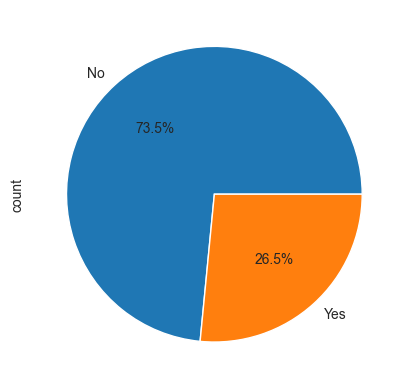

In [150]:
df2.Churn.map({1:"Yes",0:"No"}).value_counts().plot(kind="pie",autopct="%.1f%%")

In [ ]:
# fig, ax = plt.subplots(2,2,figsize=(15,10))
# sns.countplot(data=df,x="gender",ax=ax[0][0])
# ax[0][0].set_title("Gender Specific Customer Ratio")
# sns.countplot(data=df,x="Contract",ax=ax[0][1])
# ax[0][1].set_title("Customer Contracts")
# sns.countplot(data=df,x="PaymentMethod",ax=ax[1][0])
# ax[1][0].set_title("Payment Method")
# sns.countplot(data=df,x="InternetService",ax=ax[1][1])
# ax[1][1].set_title("Internet Service")
# plt.tight_layout()
# plt.show()

In [ ]:
# fig ,ax = plt.subplots(2,2,figsize=(15,10))
# sns.countplot(df,x="PaperlessBilling",ax=ax[0][0])
# sns.countplot(df,x="SeniorCitizen",ax=ax[0][1])
# sns.countplot(df,x="Dependents",ax=ax[1][0])
# sns.countplot(df,x="MultipleLines",ax=ax[1][1])

##### Numerical Columns

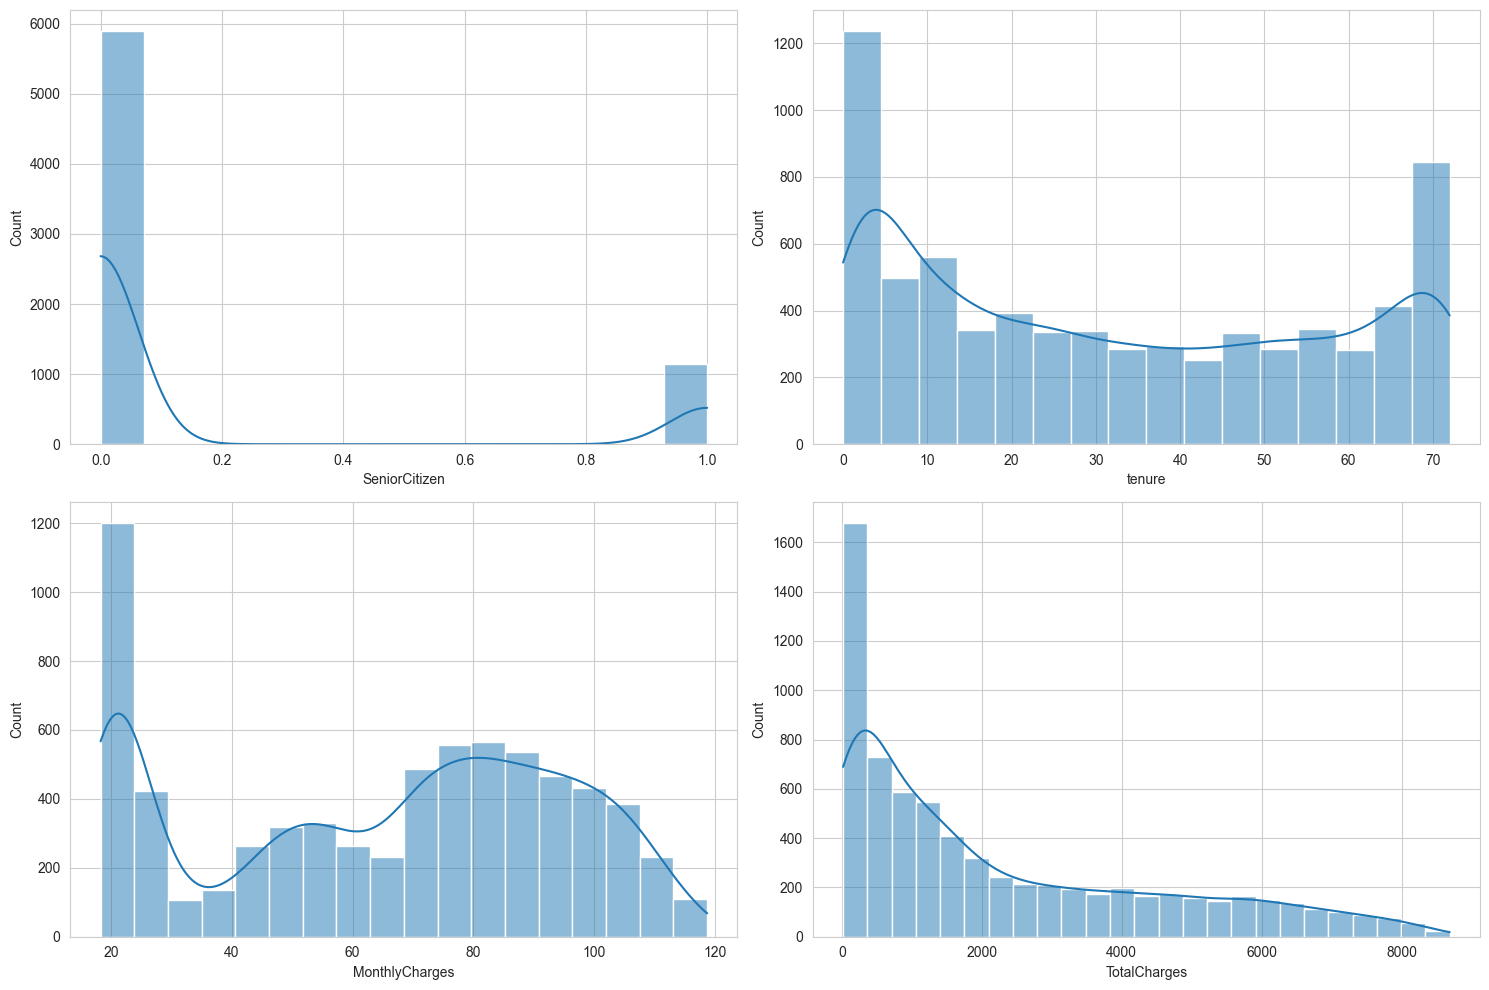

In [151]:
fig ,axes = plt.subplots(2,2,figsize=(15,10),layout="tight")
axes = axes.ravel()

for i,ax in zip(df.select_dtypes(include="number").columns,axes):
  sns.histplot(df,x=i,ax=ax,kde=True)

`Observations :`
  - where monthly charges are high customer are churning.

In [ ]:
# sns.displot(df,x="TotalCharges",ax=ax[1])

#### Bi-Variant Analysis


  - Categorical vs Categorical
  - Categorical vs Numercial
  - Numerical vs Numerical

##### Categorical vs Numerical

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [161]:
y = df2.Churn

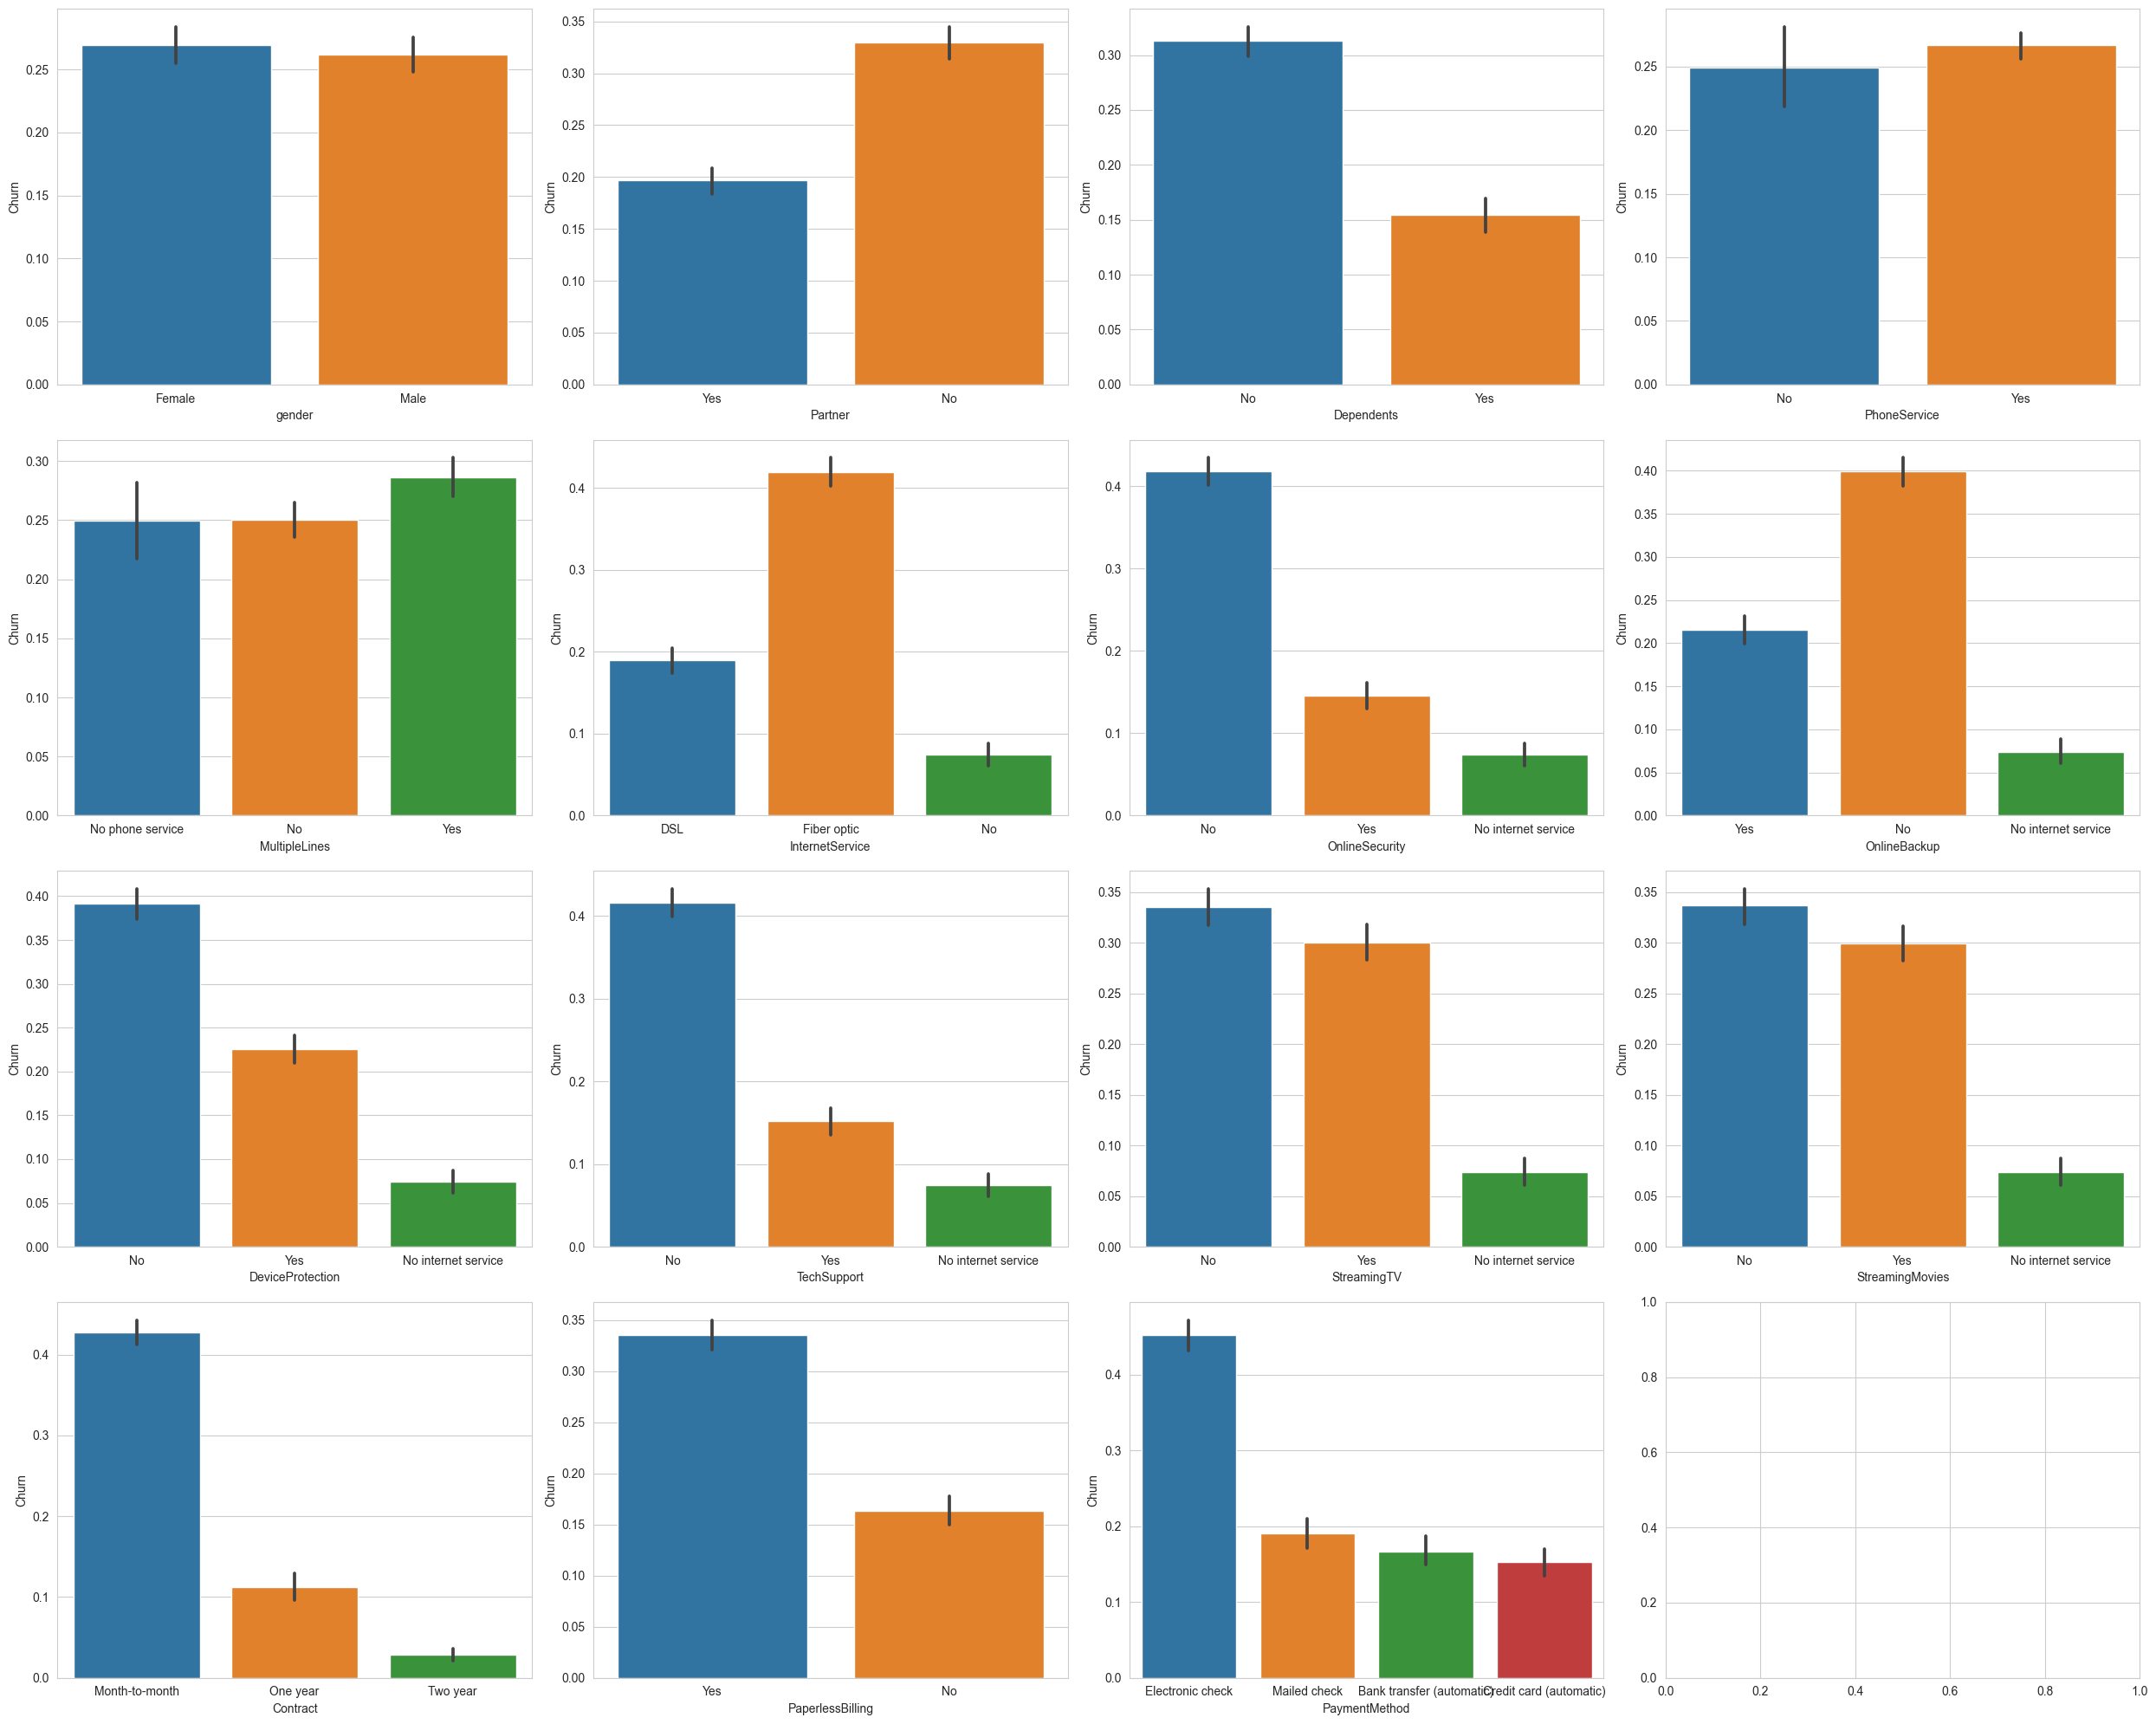

In [163]:
fig,axes = plt.subplots(4,4,figsize=(25,20))
axes = axes.ravel()
for i,ax in zip(df.select_dtypes(exclude="number"),axes):
       sns.barplot(df,x=i,y=y,ax=ax)
       plt.tight_layout()


plt.show()

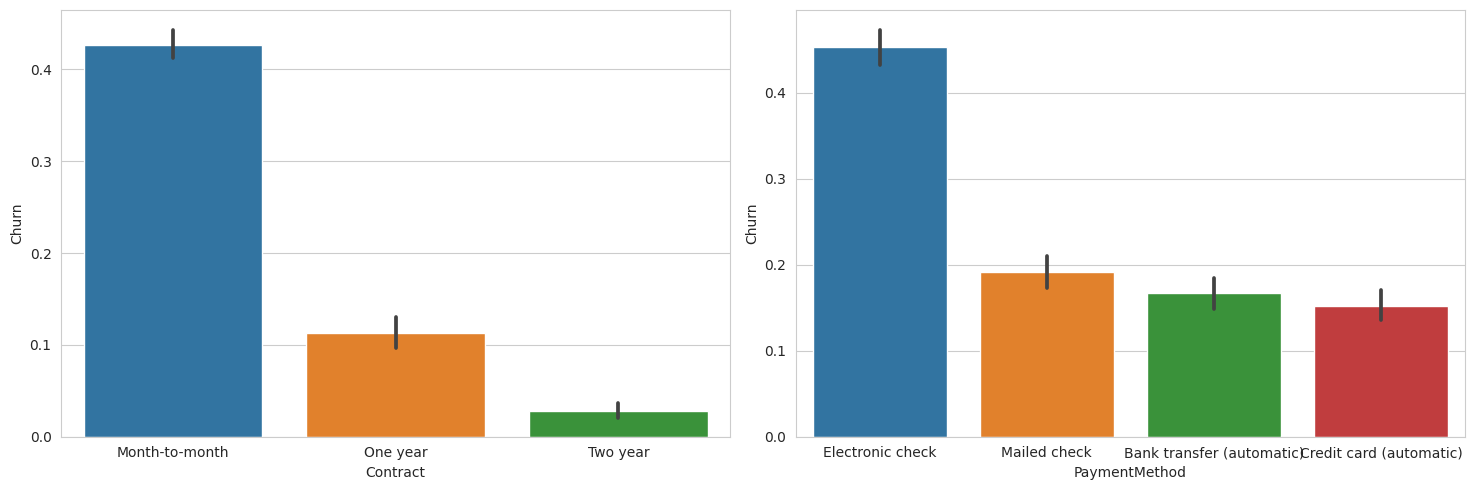

In [ ]:

#Churn rate by Contract and payment method
fig , axes = plt.subplots(1,2,figsize=(15,5))
for i,ax in zip(df[["Contract","PaymentMethod"]],axes):
        sns.barplot(df,x=i,y=y,ax=ax)
plt.tight_layout()
plt.show()

`Observations :`
  - Based on the left side Graph we can observe that people who took, "`MONTH-TO-MONTH`" as a billing contract are `CHURNING`
  - Based on the observations on the right side graph customer who are using "`Electronic Check`" as a billing method `CHURNING`

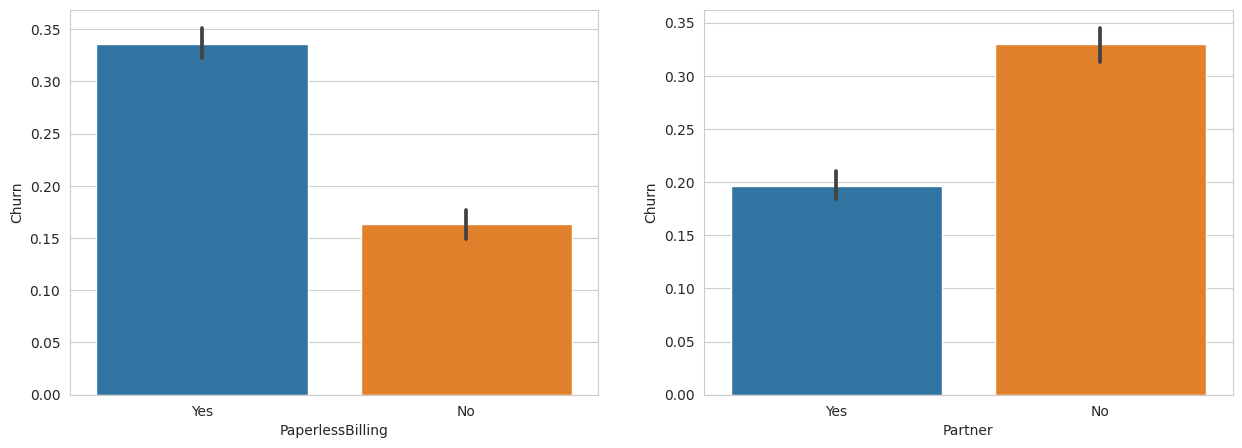

In [ ]:
fig , axes = plt.subplots(1,2,figsize=(15,5))
for i,ax in zip(df[["PaperlessBilling","Partner"]],axes):
        sns.barplot(df,x=i,y=y,ax=ax)


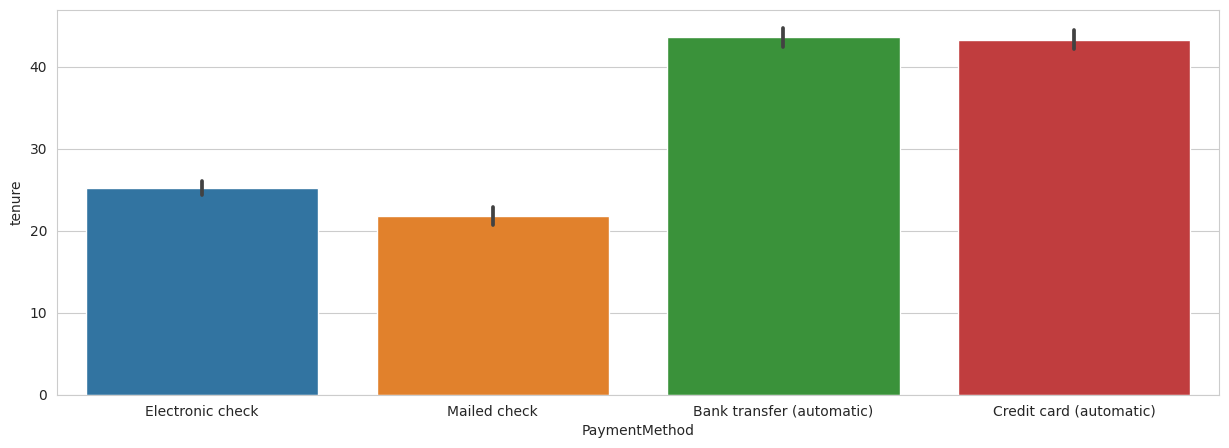

In [ ]:
#tenure vs Payment
plt.figure(figsize=(15,5))
sns.barplot(df,x="PaymentMethod",y="tenure")
plt.show()

`Observations : `
  - Based on the above graph, customers who opted for "`Mailed Check`" & `Electronic Check` has `Lower trenure rate` and they have a higher chance of `Churning`

In [ ]:
df["tenure_range"] = df["tenure"].apply(lambda x: "1-20" if x>=1 and x<=20 else "20-40" if x>=20 and x<=40 else "40-60" if x>=40 and x<=60 else "60-72" )

<Axes: xlabel='tenure_range', ylabel='Churn'>

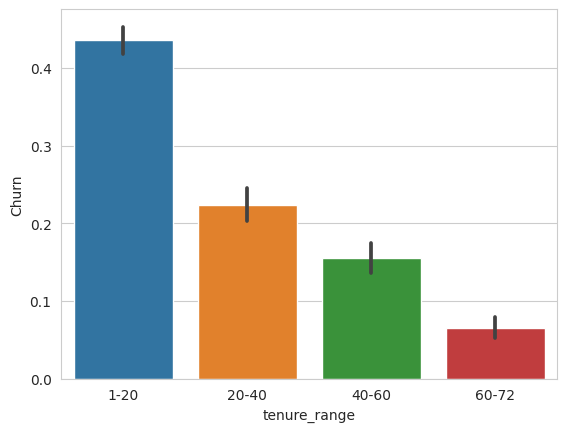

In [ ]:
sns.barplot(df,x="tenure_range", y=y)

`Observations :`
  - Customer who has a tenure between `1-20` are `Churning` more

##### Numerical vs Numerical

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

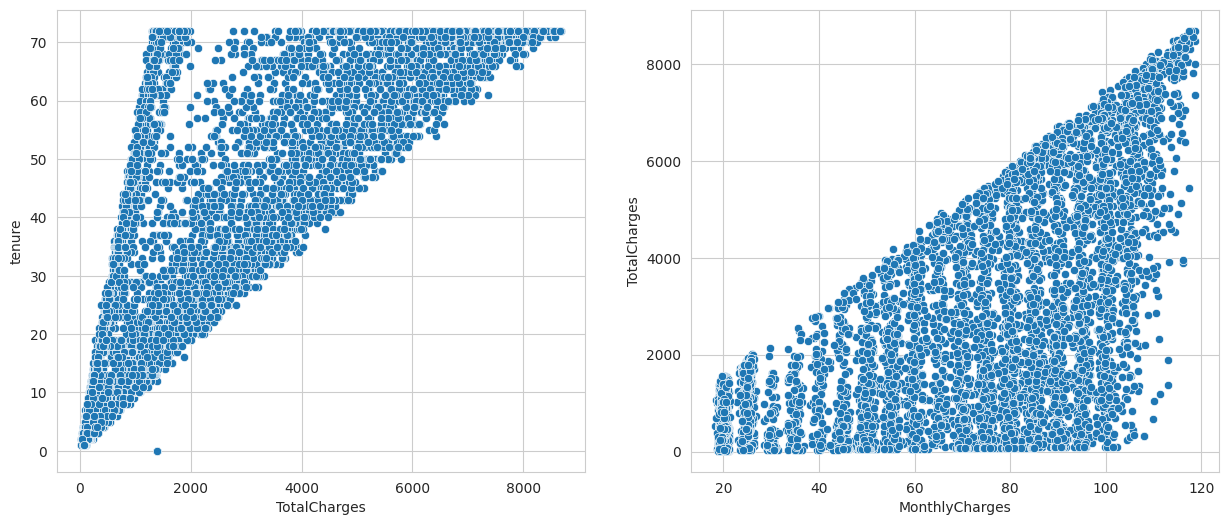

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.scatterplot(df,y="tenure",x="TotalCharges",ax=ax[0])
sns.scatterplot(df,y="TotalCharges",x="MonthlyCharges",ax=ax[1])

<Axes: xlabel='MonthlyCharges', ylabel='Contract'>

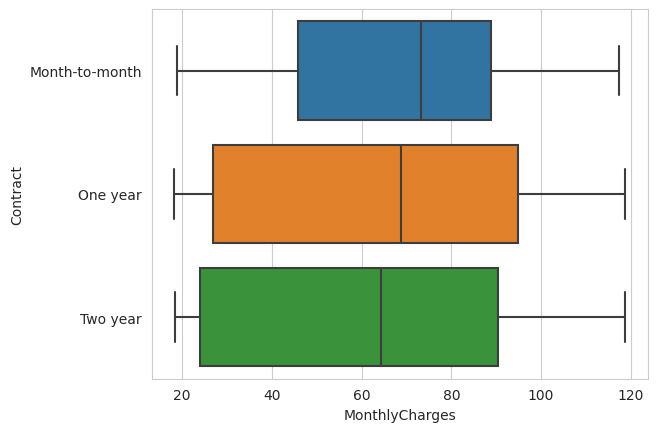

In [ ]:
sns.boxplot(df,x="MonthlyCharges",y="Contract")

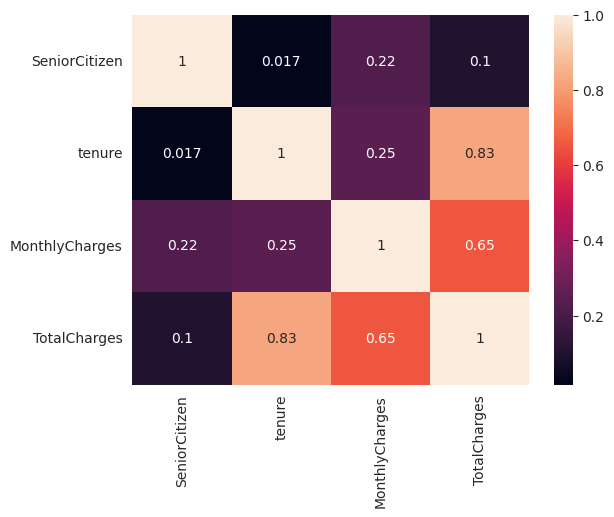

In [ ]:
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)
plt.show()

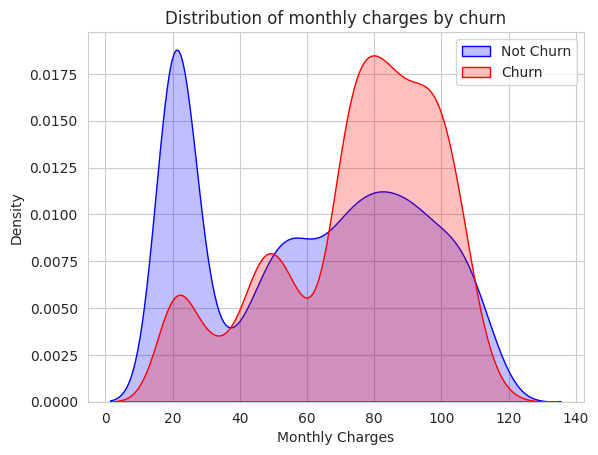

In [ ]:
# Churn by monthly charges

ax = sns.kdeplot(df.MonthlyCharges[(y == 0 ) ],
                color="Blue", fill= True)
ax = sns.kdeplot(df.MonthlyCharges[(y == 1 ) ],
                ax =ax, color="Red", fill= True)
ax.set_title('Distribution of monthly charges by churn')
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
plt.show()

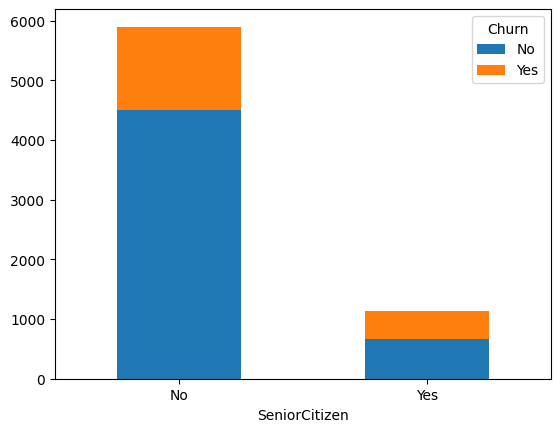

In [ ]:
df_senior = df.SeniorCitizen.map({1:"Yes",0:"No"})
pd.crosstab(df_senior,df2.Churn).plot(kind="bar",stacked=True)
plt.xticks(rotation=360)
plt.show()

<Axes: xlabel='Partner'>

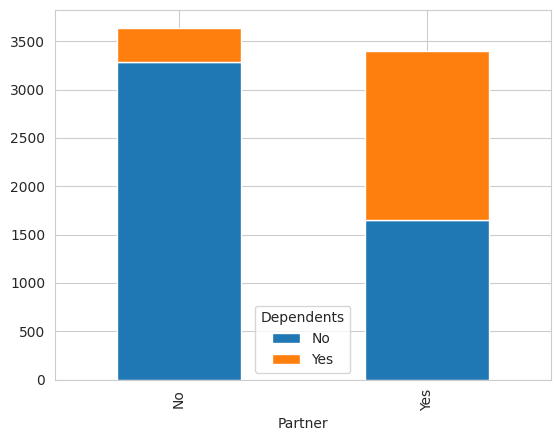

In [ ]:
pd.crosstab(df.Partner,df.Dependents).plot(kind="bar",stacked=True)

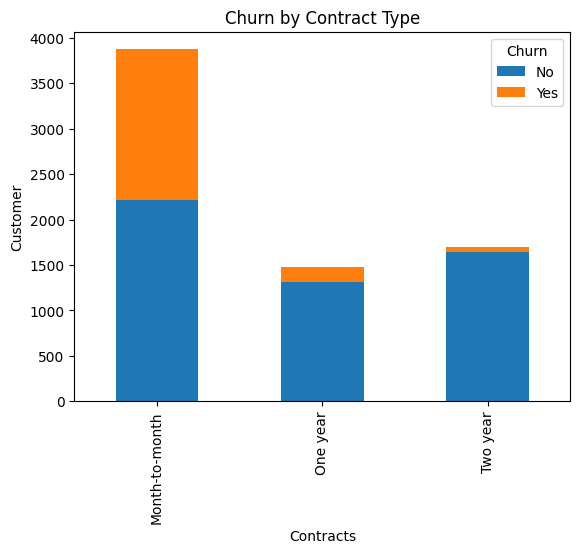

In [ ]:
pd.crosstab(df.Contract,df2.Churn).plot(kind="bar",stacked=True)
plt.title(label="Churn by Contract Type")
plt.xlabel("Contracts")
plt.ylabel("Customer")
plt.show()


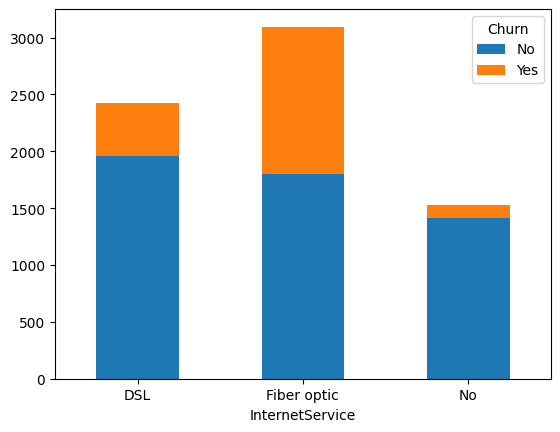

In [ ]:
pd.crosstab(df2.InternetService,df2.Churn).plot(kind="bar",stacked=True)
plt.xticks(rotation=360)
plt.show()